In [81]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.dates as mdates
import seaborn as sns

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 12, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [82]:
# clean first dataset
ZeroGroupEntrance = './dataset/zero_group_entrance_side.csv' 
df_ZeroGroupEntrance = pd.read_csv(ZeroGroupEntrance, encoding= 'unicode_escape')
df_ZeroGroupEntrance = df_ZeroGroupEntrance.drop(df_ZeroGroupEntrance.columns[[0,1,3,4,5,6,11]], axis=1)
df_ZeroGroupEntrance['ts'] = pd.to_datetime(df_ZeroGroupEntrance['ts'])
df_ZeroGroupEntrance['weekday'] = df_ZeroGroupEntrance['ts'].dt.day_name()
df_ZeroGroupEntrance['hour'] = df_ZeroGroupEntrance['ts'].dt.hour
df_ZeroGroupEntrance['EntranceDoor close'] = df_ZeroGroupEntrance['EntranceDoorzero']*20
df_ZeroGroupEntrance['T-EntranceDoor close'] = df_ZeroGroupEntrance['EntranceDoorzero']*5
# df_ZeroGroupEntrance["EntranceDoor close"].replace({0: "",}, inplace=True)


df_ZeroGroupEntrance.head()

,ts,EntranceDoorzero,HICEzero,HumidityEzero,TemperatureEzero,weekday,hour,EntranceDoor close,T-EntranceDoor close
0,2021-05-29 20:07:54,1,21.49039,47.3,22.0,Saturday,20,20,5
1,2021-05-29 20:07:55,1,21.49039,47.3,22.0,Saturday,20,20,5
2,2021-05-29 20:07:56,1,21.48778,47.2,22.0,Saturday,20,20,5
3,2021-05-29 20:07:57,1,21.48778,47.2,22.0,Saturday,20,20,5
4,2021-05-29 20:07:58,1,21.48778,47.2,22.0,Saturday,20,20,5


In [46]:
# clean second dataset
ZeroGroupKitchen = './dataset/zero_group_kitchen_side.csv' 
df_ZeroGroupKitchen = pd.read_csv(ZeroGroupKitchen, encoding= 'unicode_escape')
df_ZeroGroupKitchen = df_ZeroGroupKitchen.drop(df_ZeroGroupKitchen.columns[[0,1,3,4,5,6,11]], axis=1)
df_ZeroGroupKitchen['ts'] = pd.to_datetime(df_ZeroGroupKitchen['ts'])
df_ZeroGroupKitchen['weekday'] = df_ZeroGroupKitchen['ts'].dt.day_name()
df_ZeroGroupKitchen['hour'] = df_ZeroGroupKitchen['ts'].dt.hour
df_ZeroGroupKitchen['KitchenDoor close'] = df_ZeroGroupKitchen['DoorStatKzero']*15
df_ZeroGroupKitchen['KitchenWidow1 close'] = df_ZeroGroupKitchen['Window1StatKzero']*5
df_ZeroGroupKitchen['T-KitchenDoor close'] = df_ZeroGroupKitchen['DoorStatKzero']*3
df_ZeroGroupKitchen['T-KitchenWidow1 close'] = df_ZeroGroupKitchen['Window1StatKzero']*1

df_ZeroGroupKitchen.head()

,ts,DoorStatKzero,HICKzero,HumidityKzero,TemperatureKzero,Window1StatKzero,Window2StatKzero,weekday,hour,KitchenDoor close,KitchenWidow1 close,T-KitchenDoor close,T-KitchenWidow1 close
0,2021-05-29 20:42:02,0,21.54556,45.2,22.1,1,0,Saturday,20,0,5,0,1
1,2021-05-29 20:42:03,0,21.54556,45.2,22.1,1,0,Saturday,20,0,5,0,1
2,2021-05-29 20:42:04,0,21.58473,46.7,22.1,1,0,Saturday,20,0,5,0,1
3,2021-05-29 20:42:06,0,21.58473,46.7,22.1,1,0,Saturday,20,0,5,0,1
4,2021-05-29 20:42:07,0,21.59256,47.0,22.1,1,0,Saturday,20,0,5,0,1


In [33]:
weather = './dataset/history_weather.csv' 
df_weather = pd.read_csv(weather, encoding= 'unicode_escape')
df_weather = df_weather.drop(df_weather.columns[[2,3,6,8,9,12]], axis=1)
df_weather['Date time'] = pd.to_datetime(df_weather['Date time'])
df_weather['weekday'] = df_weather['Date time'].dt.day_name()
df_weather['hour'] = df_weather['Date time'].dt.hour
df_weather.head()

,Name,Date time,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions,weekday,hour
0,"Eindhoven, Noord-Brabant, Nederland",2021-05-29 19:50:00,18.9,NaN,0.0,16.5,11.0,10.0,86.2,52.34,Overcast,Saturday,19
1,"Eindhoven, Noord-Brabant, Nederland",2021-05-29 20:10:00,17.9,NaN,0.0,NaN,NaN,NaN,NaN,55.67,Clear,Saturday,20
2,"Eindhoven, Noord-Brabant, Nederland",2021-05-29 20:30:00,17.9,NaN,0.0,16.6,60.0,10.0,85.8,55.69,Overcast,Saturday,20
3,"Eindhoven, Noord-Brabant, Nederland",2021-05-29 20:50:00,16.9,NaN,0.0,16.3,31.0,10.0,25.0,55.85,Clear,Saturday,20
4,"Eindhoven, Noord-Brabant, Nederland",2021-05-29 21:10:00,15.9,NaN,0.0,12.9,3.0,NaN,NaN,67.35,Clear,Saturday,21


In [20]:
# combine two dataframe
# df_combined = pd.concat([df_ZeroGroupEntrance,df_ZeroGroupKitchen])
# df_combined.head()

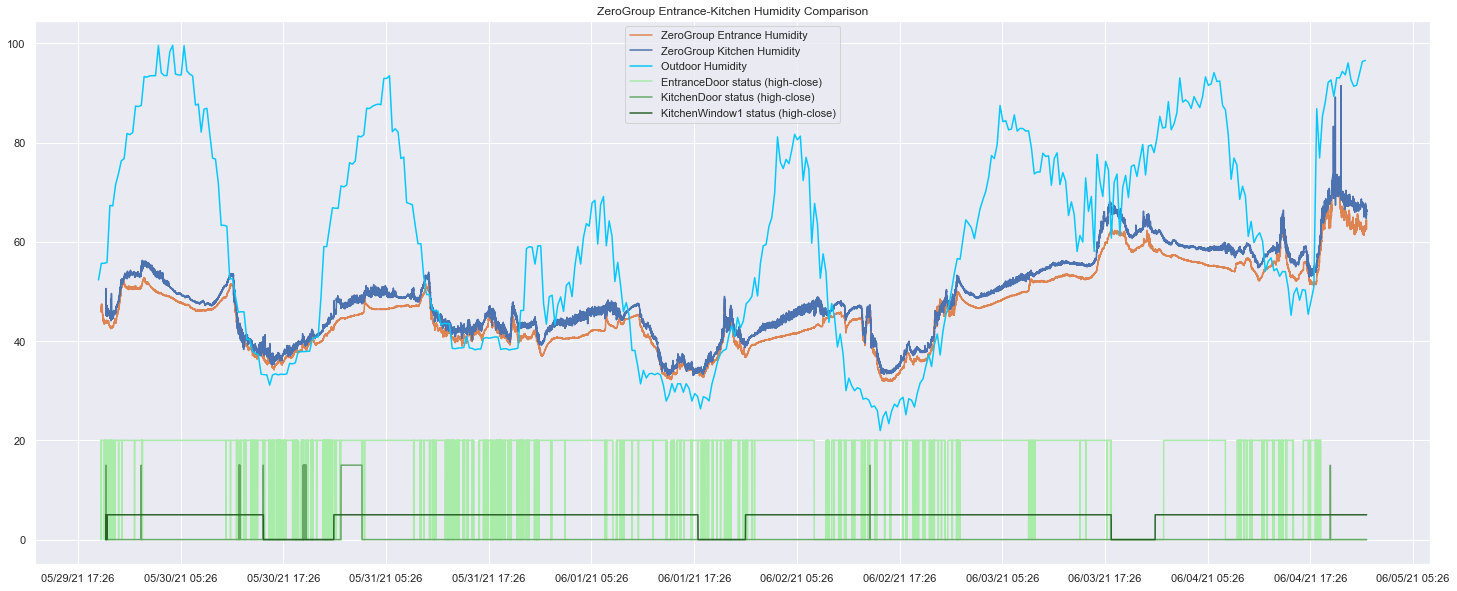

In [76]:
fig1 = plt.figure(figsize=(25, 10))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_ZeroGroupEntrance['ts'], df_ZeroGroupEntrance['HumidityEzero'], color="#DD8452")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['HumidityKzero'], color="#4C72B0")

plt.plot( df_weather['Date time'], df_weather['Relative Humidity'], color="#03c8ff")
plt.plot( df_ZeroGroupEntrance['ts'], df_ZeroGroupEntrance['EntranceDoor close'], color="#a9eba9")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['KitchenDoor close'], color="#67a867")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['KitchenWidow1 close'], color="#296329")

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("ZeroGroup Entrance-Kitchen Humidity Comparison")
ax.legend(["ZeroGroup Entrance Humidity","ZeroGroup Kitchen Humidity", "Outdoor Humidity", "EntranceDoor status (high-close)", "KitchenDoor status (high-close)", "KitchenWindow1 status (high-close)"])
# save graph
fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

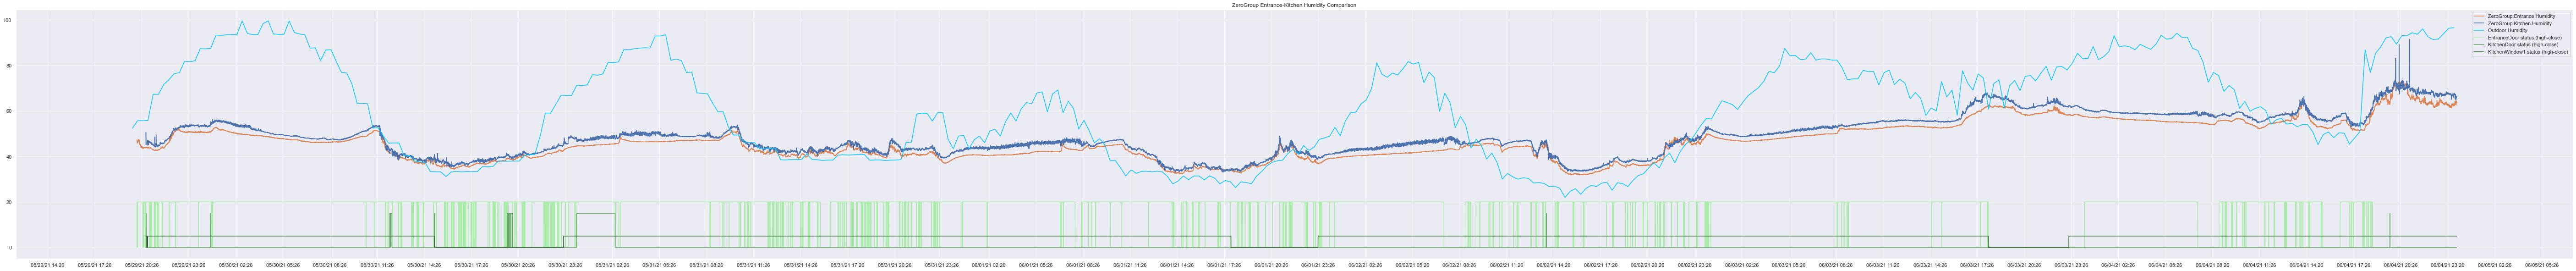

In [77]:
fig1 = plt.figure(figsize=(100, 10))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_ZeroGroupEntrance['ts'], df_ZeroGroupEntrance['HumidityEzero'], color="#DD8452")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['HumidityKzero'], color="#4C72B0")

plt.plot( df_weather['Date time'], df_weather['Relative Humidity'], color="#03c8ff")
plt.plot( df_ZeroGroupEntrance['ts'], df_ZeroGroupEntrance['EntranceDoor close'], color="#a9eba9")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['KitchenDoor close'], color="#67a867")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['KitchenWidow1 close'], color="#296329")

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=180))   #to get a tick every 3 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("ZeroGroup Entrance-Kitchen Humidity Comparison")
ax.legend(["ZeroGroup Entrance Humidity","ZeroGroup Kitchen Humidity", "Outdoor Humidity", "EntranceDoor status (high-close)", "KitchenDoor status (high-close)", "KitchenWindow1 status (high-close)"])
# save graph
fig1.savefig('ZeroGroup Entrance-Kitchen Humidity Comparison_long.png')
# Window1StatKzero

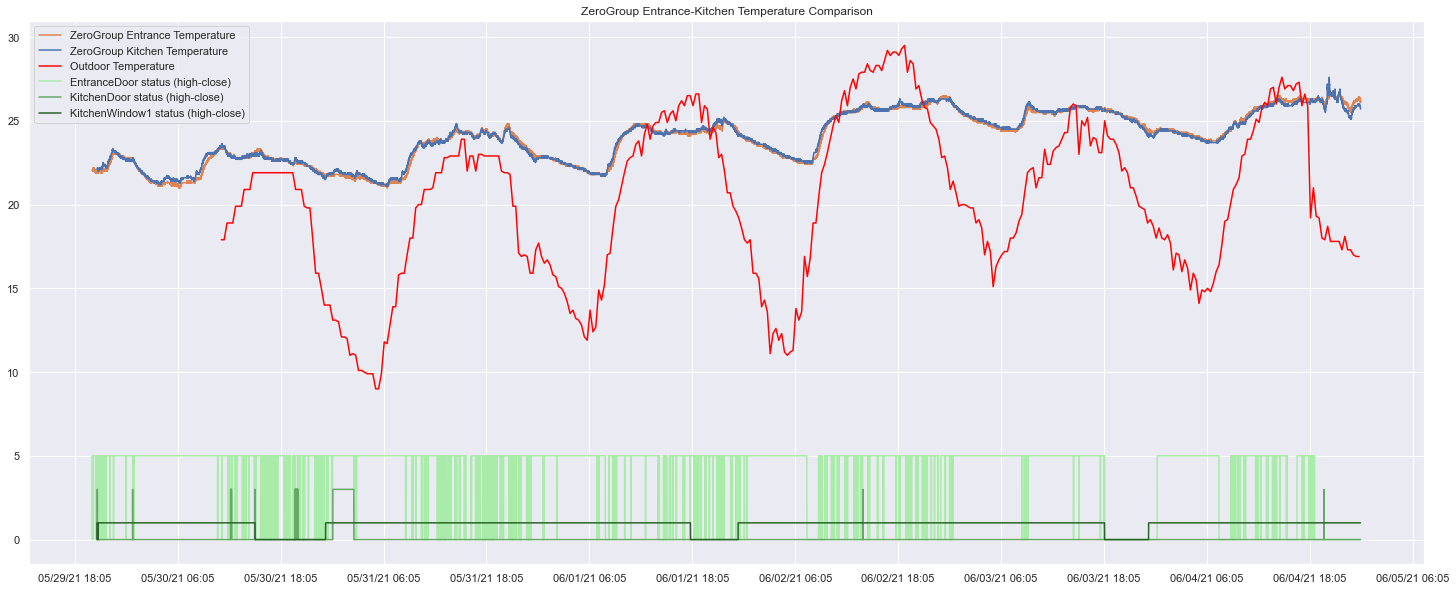

In [139]:
fig2 = plt.figure(figsize=(25, 10))
ax = fig2.add_subplot(1,1, 1)  
plt.plot( df_ZeroGroupEntrance['ts'], df_ZeroGroupEntrance['TemperatureEzero'], color="#DD8452")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['TemperatureKzero'], color="#4C72B0")
plt.plot( df_weather['Date time'], df_weather['Temperature'], color="#ff0303")
plt.plot( df_ZeroGroupEntrance['ts'], df_ZeroGroupEntrance['T-EntranceDoor close'], color="#a9eba9")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['T-KitchenDoor close'], color="#67a867")
plt.plot( df_ZeroGroupKitchen['ts'], df_ZeroGroupKitchen['T-KitchenWidow1 close'], color="#296329")
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("ZeroGroup Entrance-Kitchen Temperature Comparison")
ax.legend(["ZeroGroup Entrance Temperature","ZeroGroup Kitchen Temperature", "Outdoor Temperature", "EntranceDoor status (high-close)", "KitchenDoor status (high-close)", "KitchenWindow1 status (high-close)"])
# save graph
fig2.savefig('ZeroGroup Entrance-Kitchen Temperature Comparison.png')

In [55]:
grouped = df_ZeroGroupKitchen.groupby(['weekday', 'hour'])
df_ZeroGroupKitchen_Tem = grouped['TemperatureKzero'].mean().reset_index()

In [65]:
weekdays = [ "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_ZeroGroupKitchen_Tem.weekday = pd.Categorical(df_ZeroGroupKitchen_Tem.weekday,categories=weekdays)
df_ZeroGroupKitchen_Tem = df_ZeroGroupKitchen_Tem.sort_values('weekday')

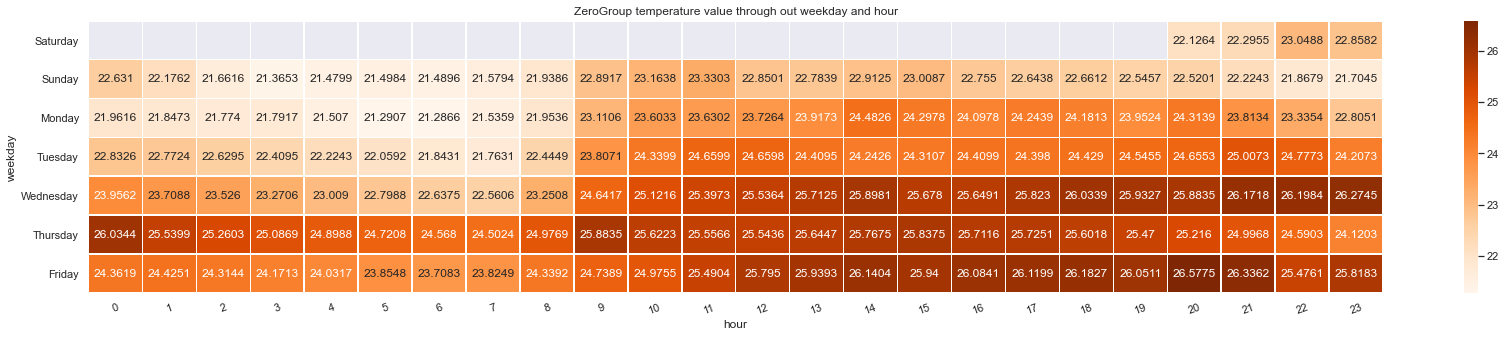

In [66]:
flights = df_ZeroGroupKitchen_Tem.pivot("weekday", "hour", "TemperatureKzero")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights, annot=True, fmt="g",cmap="Oranges", linewidths=.5, ax=ax).set_title('ZeroGroup temperature value through out weekday and hour')
plt.xticks(rotation = 20)
f.savefig('ZeroGroup temperature values through out weekday and hour.png')

In [67]:
grouped = df_ZeroGroupKitchen.groupby(['weekday', 'hour'])
df_ZeroGroupKitchen_Tem = grouped['HumidityKzero'].mean().reset_index()

In [68]:
weekdays = [ "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_ZeroGroupKitchen_Tem.weekday = pd.Categorical(df_ZeroGroupKitchen_Tem.weekday,categories=weekdays)
df_ZeroGroupKitchen_Tem = df_ZeroGroupKitchen_Tem.sort_values('weekday')

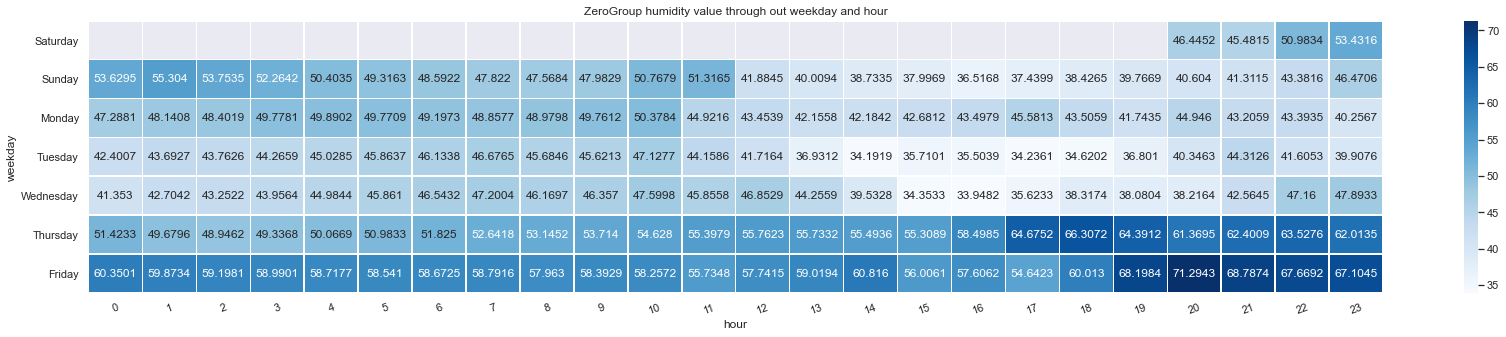

In [69]:
flights2 = df_ZeroGroupKitchen_Tem.pivot("weekday", "hour", "HumidityKzero")

# Draw a heatmap with the numeric values in each cell
f2, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights2, annot=True, fmt="g",cmap="Blues", linewidths=.5, ax=ax).set_title('ZeroGroup humidity value through out weekday and hour')
plt.xticks(rotation = 20)
f2.savefig('ZeroGroup humidity values through out weekday and hour.png')

In [72]:
Questionnaire = './dataset/questionnaire.csv' 
df_Questionnaire = pd.read_csv(Questionnaire, encoding= 'unicode_escape')
df_Questionnaire.head()

,Start time,participant,At home?,How do you feel about the humidity level in your living room right now?,You wish the humidity level in your living room to be,What would you do to make the living room more humid?,What would you do to make the humidity level in the living room to stay the same?,What would you do to make the living room drier?,What is your mood right now?,Do you think the current humidity level in the living room is influencing your mood?,Do you have visitors right now?,Do you feel safe to have visitor(s) right now (considering the Covid measurement)?,What do you think are the factors that affect the humidity level in your living room right now?,What do you think the humidity level in your living room would affect right now?,Do you have anything to add up?
0,5/31/2021 17:15,2,Yes,NaN,Stay the same,NaN,NaN,NaN,Neutral,"No, it's not influencing my mood",I don't have visitors right now,NaN,NaN,NaN,I haven't been in the living room since lunch.
1,5/31/2021 17:49,1,Yes,Very dry,More humid,Put some water in an glass in front of the win...,NaN,NaN,Tired,"No, it's not influencing my mood",My visitor(s) is in the living room,I feel safe,It is hot outside,My skin,It makes me thirsty
2,5/31/2021 20:47,2,Yes,Somewhat humid,Stay the same,NaN,"Nothing, I generally don't have very strong op...",NaN,Neutral,"No, it's not influencing my mood",My visitor(s) is in the living room,I feel safe,"The number of people, and the presence of warm...",NaN,NaN
3,5/31/2021 22:16,1,Yes,Somewhat dry,More humid,Not sure,NaN,NaN,Tired,"Yes, it's influencing my mood negatively",I don't have visitors right now,NaN,Perhaps the afzuigkap? It is also dry outdoors...,"my skin, the plants",Nope
4,6/1/2021 10:09,2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
TestGroupEntranceDoor = './dataset/test_entrance_LVES_door.csv' 
df_TestGroupEntranceDoor = pd.read_csv(TestGroupEntranceDoor, encoding= 'unicode_escape')
df_TestGroupEntranceDoor = df_TestGroupEntranceDoor.drop(df_TestGroupEntranceDoor.columns[[0,1,3,4,5,6]], axis=1)
df_TestGroupEntranceDoor['ts'] = pd.to_datetime(df_TestGroupEntranceDoor['ts'])
df_TestGroupEntranceDoor['weekday'] = df_TestGroupEntranceDoor['ts'].dt.day_name()
df_TestGroupEntranceDoor['hour'] = df_TestGroupEntranceDoor['ts'].dt.hour
df_TestGroupEntranceDoor['EntranceDoor close'] = df_TestGroupEntranceDoor['EntranceDoortest']*20
df_TestGroupEntranceDoor['T-EntranceDoor close'] = df_TestGroupEntranceDoor['EntranceDoortest']*5

df_TestGroupEntranceDoor.head()

,ts,EntranceDoortest,HICEtest,HumidityEtest,TemperatureEtest,time,weekday,hour,EntranceDoor close,T-EntranceDoor close
0,2021-05-30 11:39:55,0,26.93432,32.7,27.6,8970,Sunday,11,0,0
1,2021-05-30 11:39:56,0,26.93432,32.7,27.6,10032,Sunday,11,0,0
2,2021-05-30 11:39:57,0,25.22875,34.6,25.7,11081,Sunday,11,0,0
3,2021-05-30 11:39:59,0,25.22875,34.6,25.7,12137,Sunday,11,0,0
4,2021-05-30 11:40:00,0,25.23136,34.7,25.7,13187,Sunday,11,0,0


In [130]:
TestGroupKitchenDoor = './dataset//test_group_LVKS_kitchen_door.csv' 
df_TestGroupKitchenDoor = pd.read_csv(TestGroupKitchenDoor, encoding= 'unicode_escape')
df_TestGroupKitchenDoor = df_TestGroupKitchenDoor.drop(df_TestGroupKitchenDoor.columns[[0,1,3,4,5,6]], axis=1)
df_TestGroupKitchenDoor['ts'] = pd.to_datetime(df_TestGroupKitchenDoor['ts'])
df_TestGroupKitchenDoor['weekday'] = df_TestGroupKitchenDoor['ts'].dt.day_name()
df_TestGroupKitchenDoor['hour'] = df_TestGroupKitchenDoor['ts'].dt.hour
df_TestGroupKitchenDoor['KitchenDoor close'] = df_TestGroupKitchenDoor['KitchenDoortest']*15
df_TestGroupKitchenDoor['T-KitchenDoor close'] = df_TestGroupKitchenDoor['KitchenDoortest']*3

df_TestGroupKitchenDoor.head()

,ts,HICKtest,HumidityKtest,KitchenDoortest,TemperatureKtest,time,weekday,hour,KitchenDoor close,T-KitchenDoor close
0,2021-05-30 11:32:47,28.61791,39.0,0,29.1,7963,Sunday,11,0,0
1,2021-05-30 11:32:48,28.61791,39.0,0,29.1,9030,Sunday,11,0,0
2,2021-05-30 11:32:49,26.35507,34.6,0,26.6,10081,Sunday,11,0,0
3,2021-05-30 11:32:50,26.35507,34.6,0,26.6,11133,Sunday,11,0,0
4,2021-05-30 11:32:51,26.10873,34.6,0,26.5,12187,Sunday,11,0,0


In [136]:
TestGroupSliderWindow = './dataset/test_group_slider_big_slider_window.csv' 
df_TestGroupSliderWindow = pd.read_csv(TestGroupSliderWindow, encoding= 'unicode_escape')
df_TestGroupSliderWindow = df_TestGroupSliderWindow.drop(df_TestGroupSliderWindow.columns[[0,1,3,4,5,6]], axis=1)
df_TestGroupSliderWindow['ts'] = pd.to_datetime(df_TestGroupSliderWindow['ts'])
df_TestGroupSliderWindow['weekday'] = df_TestGroupSliderWindow['ts'].dt.day_name()
df_TestGroupSliderWindow['hour'] = df_TestGroupSliderWindow['ts'].dt.hour
conditions = [
    (df_TestGroupSliderWindow['BigWindowFull'] == 0),
    (df_TestGroupSliderWindow['BigWindowOpenElse'] == 0),
    (df_TestGroupSliderWindow['BigWindowTilt'] == 0)
    ]
values = [0, 8, 4]
df_TestGroupSliderWindow['SlideDoor close'] = np.select(conditions, values)
df_TestGroupSliderWindow['T-SlideDoor close'] = df_TestGroupSliderWindow['SlideDoor close']*0.25
df_TestGroupSliderWindow.head()

,ts,BigWindowFull,BigWindowOpenElse,BigWindowTilt,HIC,HICWtest,Humidity,HumidityWtest,Temperature,TemperatureWtest,time,weekday,hour,SlideDoor close,T-SlideDoor close
0,2021-05-30 14:20:21,1,0,1,24.74925,NaN,37.3,NaN,25.2,NaN,7924,Sunday,14,8,2.0
1,2021-05-30 14:20:22,1,0,1,24.74925,NaN,37.3,NaN,25.2,NaN,8976,Sunday,14,8,2.0
2,2021-05-30 14:20:23,1,0,1,23.68354,NaN,34.4,NaN,24.3,NaN,10036,Sunday,14,8,2.0
3,2021-05-30 14:20:24,1,0,1,23.68354,NaN,34.4,NaN,24.3,NaN,11081,Sunday,14,8,2.0
4,2021-05-30 14:20:25,1,0,1,23.68354,NaN,34.4,NaN,24.3,NaN,12135,Sunday,14,8,2.0


In [98]:
weather_t = './dataset/history_weather_t.csv' 
df_weather_t = pd.read_csv(weather_t, encoding= 'unicode_escape')
df_weather_t = df_weather_t.drop(df_weather_t.columns[[2,3,6,8,9,12]], axis=1)
df_weather_t['Date time'] = pd.to_datetime(df_weather_t['Date time'])
df_weather_t['weekday'] = df_weather_t['Date time'].dt.day_name()
df_weather_t['hour'] = df_weather_t['Date time'].dt.hour
df_weather_t.head()

,Name,Date time,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions,weekday,hour
0,"Eindhoven, Noord-Brabant, Nederland",2021-05-30 11:10:00,17.9,NaN,0.0,12.9,NaN,NaN,NaN,52.54,Clear,Sunday,11
1,"Eindhoven, Noord-Brabant, Nederland",2021-05-30 11:30:00,17.9,NaN,0.0,12.9,60.0,10.0,17.1,52.60,Clear,Sunday,11
2,"Eindhoven, Noord-Brabant, Nederland",2021-05-30 11:50:00,18.9,NaN,0.0,11.2,60.0,10.0,25.0,49.04,Clear,Sunday,11
3,"Eindhoven, Noord-Brabant, Nederland",2021-05-30 12:10:00,18.9,NaN,0.0,13.0,79.0,NaN,NaN,45.85,Clear,Sunday,12
4,"Eindhoven, Noord-Brabant, Nederland",2021-05-30 12:30:00,18.9,NaN,0.0,12.9,79.0,10.0,0.0,45.92,Clear,Sunday,12


<ipython-input-123-d856743c8ee8>:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig1.savefig('TestGroup Entrance-Kitchen Humidity Comparison.png')
C:\Users\20175115\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


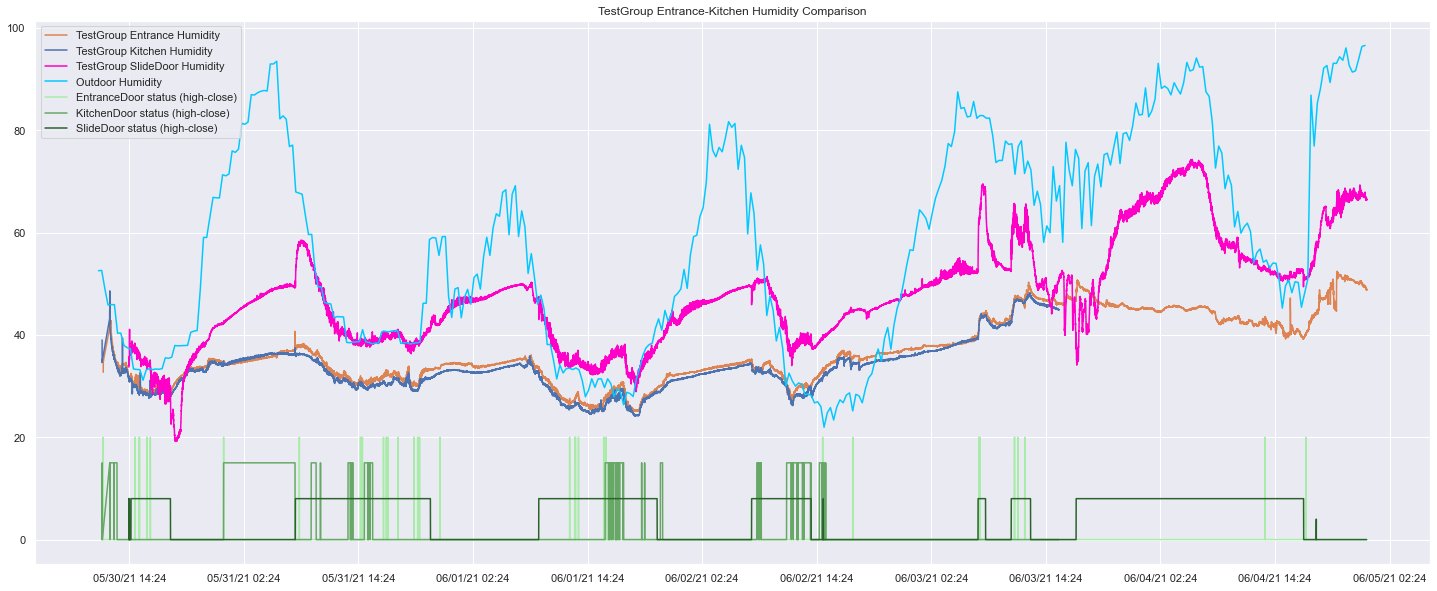

In [123]:
fig1 = plt.figure(figsize=(25, 10))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_TestGroupEntranceDoor['ts'], df_TestGroupEntranceDoor['HumidityEtest'], color="#DD8452")
plt.plot( df_TestGroupKitchenDoor['ts'], df_TestGroupKitchenDoor['HumidityKtest'], color="#4C72B0")
plt.plot( df_TestGroupSliderWindow['ts'], df_TestGroupSliderWindow['HumidityWtest'], color="#ff00c8")

plt.plot( df_weather_t['Date time'], df_weather_t['Relative Humidity'], color="#03c8ff")

plt.plot( df_TestGroupEntranceDoor['ts'], df_TestGroupEntranceDoor['EntranceDoor close'], color="#a9eba9")
plt.plot( df_TestGroupKitchenDoor['ts'], df_TestGroupKitchenDoor['KitchenDoor close'], color="#67a867")
plt.plot( df_TestGroupSliderWindow['ts'], df_TestGroupSliderWindow['SlideDoor close'], color="#296329")

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("TestGroup Entrance-Kitchen Humidity Comparison")
ax.legend(["TestGroup Entrance Humidity","TestGroup Kitchen Humidity", "TestGroup SlideDoor Humidity", "Outdoor Humidity", "EntranceDoor status (high-close)", "KitchenDoor status (high-close)", "SlideDoor status (high-close)"])
# save graph
fig1.savefig('TestGroup Entrance-Kitchen Humidity Comparison.png')
# Window1StatKzero

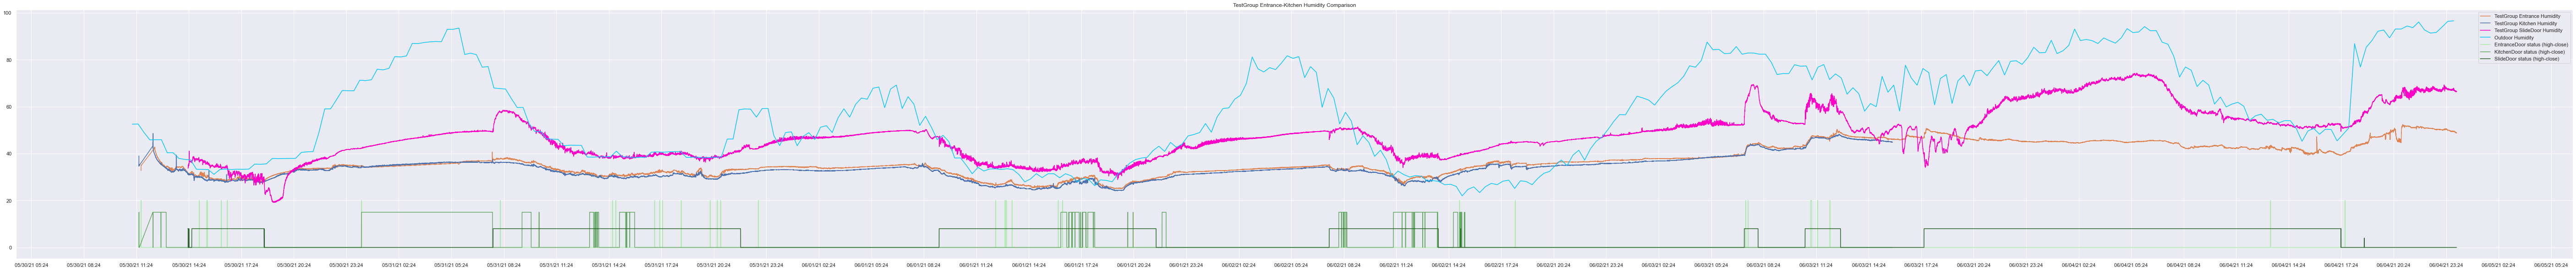

In [128]:
fig1 = plt.figure(figsize=(100, 10))
ax = fig1.add_subplot(1,1, 1)  
plt.plot( df_TestGroupEntranceDoor['ts'], df_TestGroupEntranceDoor['HumidityEtest'], color="#DD8452")
plt.plot( df_TestGroupKitchenDoor['ts'], df_TestGroupKitchenDoor['HumidityKtest'], color="#4C72B0")
plt.plot( df_TestGroupSliderWindow['ts'], df_TestGroupSliderWindow['HumidityWtest'], color="#ff00c8")

plt.plot( df_weather_t['Date time'], df_weather_t['Relative Humidity'], color="#03c8ff")

plt.plot( df_TestGroupEntranceDoor['ts'], df_TestGroupEntranceDoor['EntranceDoor close'], color="#a9eba9")
plt.plot( df_TestGroupKitchenDoor['ts'], df_TestGroupKitchenDoor['KitchenDoor close'], color="#67a867")
plt.plot( df_TestGroupSliderWindow['ts'], df_TestGroupSliderWindow['SlideDoor close'], color="#296329")

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=180))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("TestGroup Entrance-Kitchen Humidity Comparison")
ax.legend(["TestGroup Entrance Humidity","TestGroup Kitchen Humidity", "TestGroup SlideDoor Humidity", "Outdoor Humidity", "EntranceDoor status (high-close)", "KitchenDoor status (high-close)", "SlideDoor status (high-close)"])
# save graph
fig1.savefig('TestGroup Entrance-Kitchen Humidity Comparison_long.png')
# Window1StatKzero

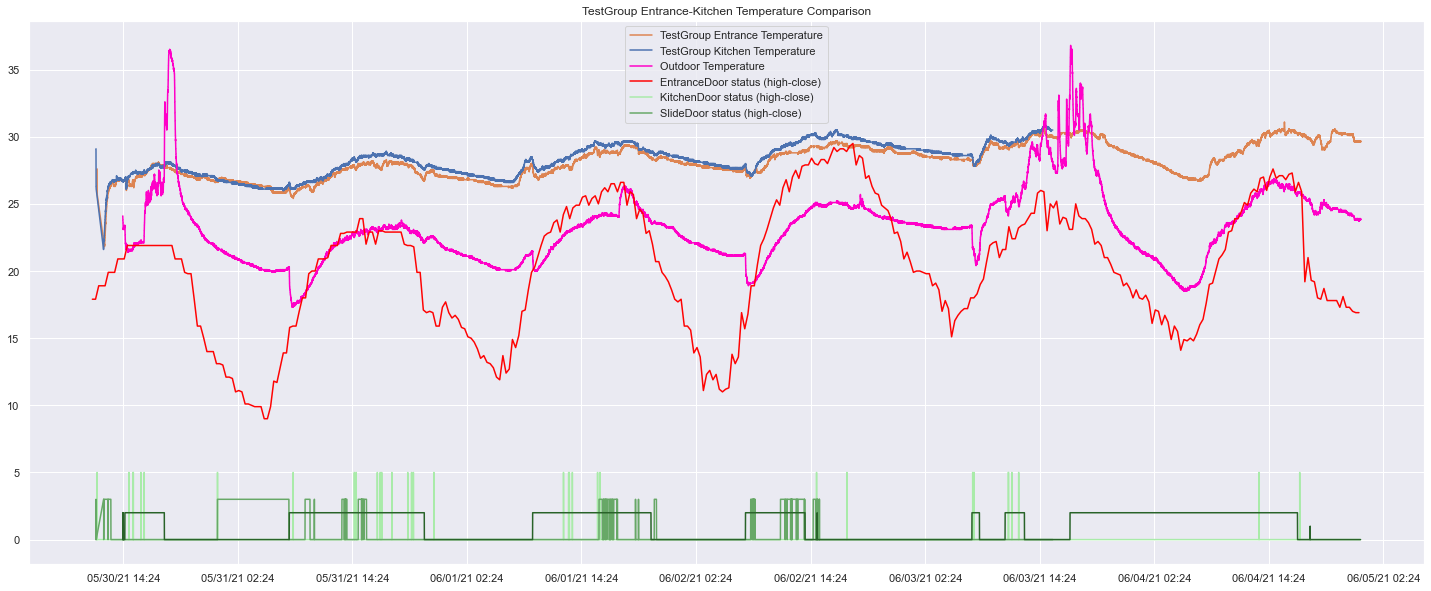

In [138]:
fig2 = plt.figure(figsize=(25, 10))
ax = fig2.add_subplot(1,1, 1)  
plt.plot( df_TestGroupEntranceDoor['ts'], df_TestGroupEntranceDoor['TemperatureEtest'], color="#DD8452")
plt.plot( df_TestGroupKitchenDoor['ts'], df_TestGroupKitchenDoor['TemperatureKtest'], color="#4C72B0")
plt.plot( df_TestGroupSliderWindow['ts'], df_TestGroupSliderWindow['TemperatureWtest'], color="#ff00c8")

plt.plot( df_weather_t['Date time'], df_weather_t['Temperature'], color="#ff0303")

plt.plot( df_TestGroupEntranceDoor['ts'], df_TestGroupEntranceDoor['T-EntranceDoor close'], color="#a9eba9")
plt.plot( df_TestGroupKitchenDoor['ts'], df_TestGroupKitchenDoor['T-KitchenDoor close'], color="#67a867")
plt.plot( df_TestGroupSliderWindow['ts'], df_TestGroupSliderWindow['T-SlideDoor close'], color="#296329")

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("TestGroup Entrance-Kitchen Temperature Comparison")
ax.legend(["TestGroup Entrance Temperature","TestGroup Kitchen Temperature", "Outdoor Temperature", "EntranceDoor status (high-close)", "KitchenDoor status (high-close)", "SlideDoor status (high-close)"])
# save graph
fig2.savefig('TestGroup Entrance-Kitchen Temperature Comparison.png')

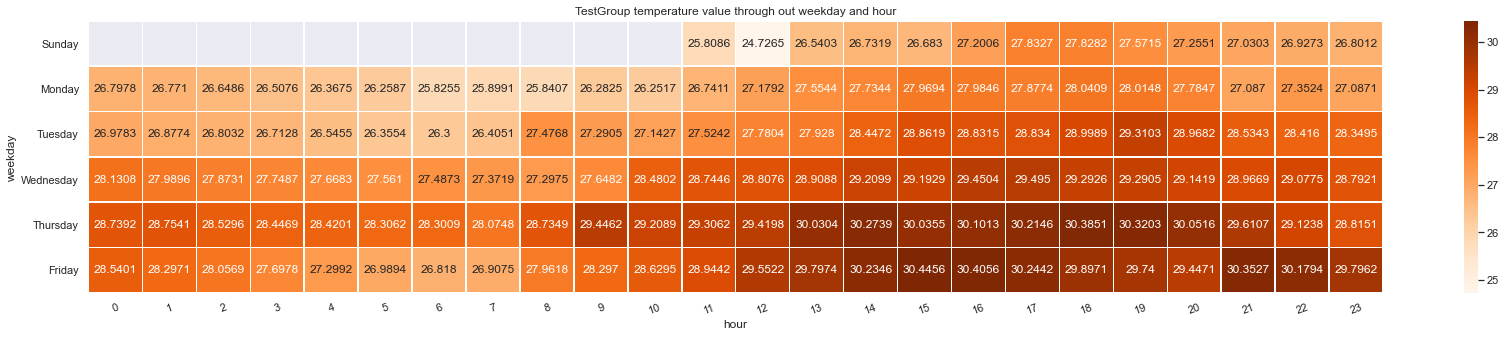

In [144]:
grouped = df_TestGroupEntranceDoor.groupby(['weekday', 'hour'])
df_TestGroupEntranceDoor_Tem = grouped['TemperatureEtest'].mean().reset_index()

weekdays = [ "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_TestGroupEntranceDoor_Tem.weekday = pd.Categorical(df_TestGroupEntranceDoor_Tem.weekday,categories=weekdays)
df_TestGroupEntranceDoor_Tem = df_TestGroupEntranceDoor_Tem.sort_values('weekday')

flights = df_TestGroupEntranceDoor_Tem.pivot("weekday", "hour", "TemperatureEtest")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights, annot=True, fmt="g",cmap="Oranges", linewidths=.5, ax=ax).set_title('TestGroup temperature value through out weekday and hour')
plt.xticks(rotation = 20)
f.savefig('TestGroup temperature values through out weekday and hour.png')

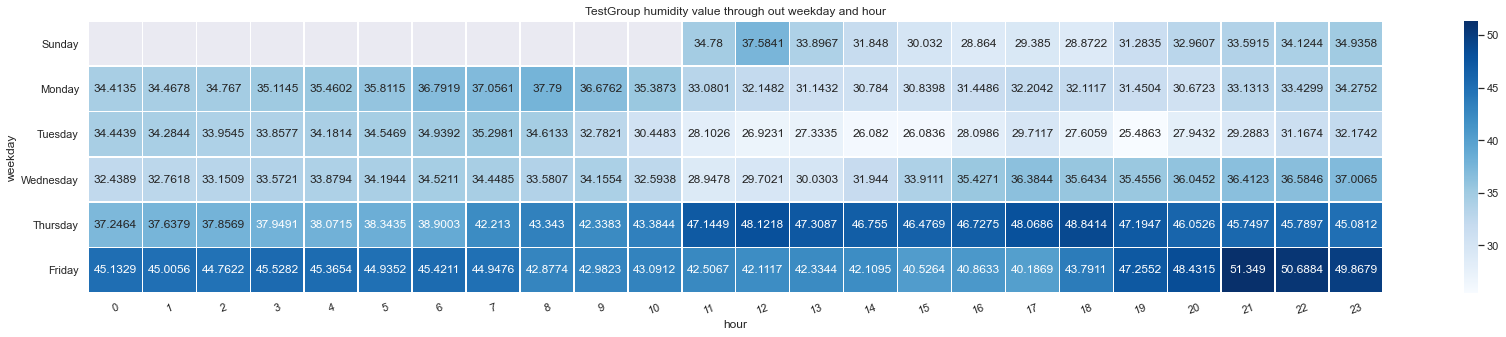

In [145]:
grouped = df_TestGroupEntranceDoor.groupby(['weekday', 'hour'])
df_TestGroupEntranceDoor_Tem = grouped['HumidityEtest'].mean().reset_index()

weekdays = [ "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_TestGroupEntranceDoor_Tem.weekday = pd.Categorical(df_TestGroupEntranceDoor_Tem.weekday,categories=weekdays)
df_TestGroupEntranceDoor_Tem = df_TestGroupEntranceDoor_Tem.sort_values('weekday')

flights = df_TestGroupEntranceDoor_Tem.pivot("weekday", "hour", "HumidityEtest")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights, annot=True, fmt="g",cmap="Blues", linewidths=.5, ax=ax).set_title('TestGroup humidity value through out weekday and hour')
plt.xticks(rotation = 20)
f.savefig('TestGroup Humidity values through out weekday and hour.png')